# Blog Authorship Corpus
Classification is probably the most popular task that you would deal with in real life.
Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the
information about the writer without knowing about him/her.
We are going to create a classifier that predicts multiple features of the author of a given text.
We have designed it as a Multilabel classification problem.
Dataset
Blog Authorship Corpus

Over 600,000 posts from more than 19 thousand bloggers
The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from
blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million
words - or approximately 35 posts and 7250 words per person.
Each blog is presented as a separate file, the name of which indicates a blogger id# and the
blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and
age but for many, industry and/or sign is marked as unknown.)


All bloggers included in the corpus fall into one of three age groups:
8240 "10s" blogs (ages 13-17),
8086 "20s" blogs(ages 23-27)
2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting
has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label urllink.

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
#import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Load the dataset

In [3]:
#load the full set of the data
blog_df = pd.read_csv("C:/Users/varun/Desktop/blogtext.csv")

In [4]:
# check the shape of the data frame by using the shape attribute of the data frame
blog_df.shape

(681284, 7)

In [5]:
#check if the data frame is properly loaded using the sample() method
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
341906,3627138,male,37,Arts,Gemini,"09,July,2004",Okay. What is going to happen...
195425,1951423,female,24,Arts,Scorpio,"23,February,2004",okay so that isnt going to work because...
172693,3427664,male,35,indUnk,Taurus,"23,June,2004","Again, I agree with Mr. Prage..."
657393,2854177,male,25,indUnk,Capricorn,"07,August,2004",Read urlLink this post about sex with ...
363554,3703378,male,17,Technology,Aries,"21,June,2004",My mom bought a Mitsubishi 3000GT witho...


In [6]:
#Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.
#Limiting the data and using fewer rows as the data size is large
#blog_df = blog_df.head(10000)

blog_df = pd.read_csv("C:/Users/Varun/Desktop/blogtext.csv",nrows=100000)

In [7]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [8]:
#check if the last 5 rows of the data frame using the tail() method
blog_df.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [9]:
#check the feature/columns  using the info method
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [10]:
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

# EDA with Pandas Profiler

In [11]:
#pp.ProfileReport(blog_df)

In [12]:
#chceck for na values
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

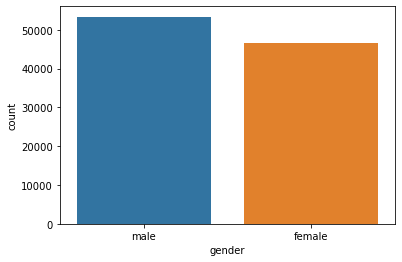

In [13]:
sns.countplot(x='gender',data=blog_df)

<AxesSubplot:xlabel='sign', ylabel='count'>

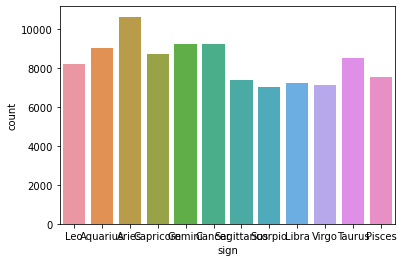

In [14]:
sns.countplot(x='sign',data=blog_df)

In [15]:
#chceck for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

# 2 Preprocess rows of the “text” column 

a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [16]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [17]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [18]:
#covert text to lower
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [19]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [20]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [21]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [22]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [23]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [24]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info has been found 100 pages and 45 mb of pd...
1,male,15,Student,Leo,these are the team members drewes van der la...
2,male,15,Student,Leo,in het kader van kernfusie op aarde maak je e...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks to yahoos toolbar i can now capture the...


# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [25]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [26]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info has been found 100 pages and 45 mb of pd...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,these are the team members drewes van der la...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,in het kader van kernfusie op aarde maak je e...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks to yahoos toolbar i can now capture the...,"[male, 33, InvestmentBanking, Aquarius]"


In [27]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [28]:
blog_df.head()

,text,labels
0,info has been found 100 pages and 45 mb of pd...,"[male, 15, Student, Leo]"
1,these are the team members drewes van der la...,"[male, 15, Student, Leo]"
2,in het kader van kernfusie op aarde maak je e...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks to yahoos toolbar i can now capture the...,"[male, 33, InvestmentBanking, Aquarius]"


# 4. Separate features and labels, and split the data into training and testing 

In [29]:
X= blog_df.text
y = blog_df.labels

In [30]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [31]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [32]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [33]:
X_test

6448        a bird that buries its head in mashed potatoes
50680    ok this seriously just ruined my day  i am lik...
814      astro vs braves   just got back from minute ma...
20354    greetings welcome to my  first ever  blog  the...
49224    she walks in the door and the room always brig...
                               ...                        
47661    hey cool jo no problem  understandable sounds ...
56256    last night i went to see the new harry potter ...
92555    urllink when instant messages come bearing mal...
36328    i srajan and the gamers of the sections of cla...
73345    so monqiue and i got back together it wasnt qu...
Name: text, Length: 20000, dtype: object

# 5. Vectorize the features
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [34]:
cvect = CountVectorizer(ngram_range=(1,2))

In [35]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

3727404

In [36]:
cvect.get_feature_names()

['00',
 '00 and',
 '00 damn',
 '00 draw',
 '00 games',
 '00 not',
 '00 sometimes',
 '00 sq',
 '00 tcr1',
 '00 then',
 '00 this',
 '00 tie',
 '00 until',
 '00 uppercase_75_100',
 '00 was',
 '00 watch',
 '00 we',
 '00 well',
 '00 what',
 '000',
 '000 address',
 '000 and',
 '000 at',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 et',
 '000 ft',
 '000 fulltime',
 '000 heh',
 '000 if',
 '000 in',
 '000 it',
 '000 leaving',
 '000 my',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 and',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 if',
 '0000 still',
 '0000 subject',
 '0000 to',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '000000000000000000000section c09er',
 '00000000345',
 '00000000345 

In [37]:
X_train_ct = cvect.transform(X_train)

In [38]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [39]:
X_train_ct

<80000x3727404 sparse matrix of type '<class 'numpy.int64'>'
	with 21906217 stored elements in Compressed Sparse Row format>

In [40]:
X_train_ct[0]

<1x3727404 sparse matrix of type '<class 'numpy.int64'>'
	with 770 stored elements in Compressed Sparse Row format>

In [41]:
X_test_ct = cvect.transform(X_test)

In [42]:
X_test_ct

<20000x3727404 sparse matrix of type '<class 'numpy.int64'>'
	with 4899593 stored elements in Compressed Sparse Row format>

In [43]:
cvect.get_feature_names()[:10]

['00',
 '00 and',
 '00 damn',
 '00 draw',
 '00 games',
 '00 not',
 '00 sometimes',
 '00 sq',
 '00 tcr1',
 '00 then']

In [44]:
print(X_train_ct)

  (0, 9189)	1
  (0, 9207)	1
  (0, 9604)	1
  (0, 9605)	1
  (0, 12103)	1
  (0, 12104)	1
  (0, 36536)	1
  (0, 36537)	1
  (0, 37994)	1
  (0, 38079)	1
  (0, 58977)	1
  (0, 58978)	1
  (0, 81610)	1
  (0, 81630)	1
  (0, 83537)	1
  (0, 86963)	1
  (0, 102745)	1
  (0, 103114)	1
  (0, 107500)	2
  (0, 107607)	1
  (0, 109247)	1
  (0, 129962)	1
  (0, 131127)	1
  (0, 154586)	1
  (0, 155429)	1
  :	:
  (79999, 2071038)	1
  (79999, 2110099)	1
  (79999, 2111834)	1
  (79999, 2167298)	1
  (79999, 2169712)	1
  (79999, 2175325)	1
  (79999, 2175725)	1
  (79999, 2653566)	1
  (79999, 2653584)	1
  (79999, 2837839)	1
  (79999, 2837860)	1
  (79999, 3104906)	1
  (79999, 3105269)	1
  (79999, 3141418)	1
  (79999, 3168375)	1
  (79999, 3226154)	1
  (79999, 3228089)	1
  (79999, 3331693)	1
  (79999, 3331745)	1
  (79999, 3411224)	1
  (79999, 3414083)	1
  (79999, 3563459)	1
  (79999, 3567493)	1
  (79999, 3694464)	1
  (79999, 3701116)	1


In [45]:
print(X_test_ct)

  (0, 456298)	1
  (0, 456518)	1
  (0, 541207)	1
  (0, 1427832)	1
  (0, 1428303)	1
  (0, 1574948)	1
  (0, 1675790)	1
  (0, 1678851)	1
  (0, 1962979)	1
  (0, 1962990)	1
  (0, 2509262)	1
  (0, 3124069)	1
  (1, 7684)	1
  (1, 7743)	1
  (1, 18413)	1
  (1, 59586)	1
  (1, 59675)	1
  (1, 65865)	1
  (1, 69467)	1
  (1, 83537)	12
  (1, 84041)	1
  (1, 85948)	1
  (1, 86184)	1
  (1, 86752)	1
  (1, 86977)	1
  :	:
  (19999, 3309145)	1
  (19999, 3309570)	1
  (19999, 3411224)	1
  (19999, 3416096)	1
  (19999, 3462034)	1
  (19999, 3501724)	3
  (19999, 3506317)	1
  (19999, 3507968)	1
  (19999, 3508589)	1
  (19999, 3515201)	1
  (19999, 3516011)	1
  (19999, 3526746)	1
  (19999, 3526976)	1
  (19999, 3527794)	3
  (19999, 3527906)	1
  (19999, 3529490)	1
  (19999, 3531223)	1
  (19999, 3547503)	1
  (19999, 3550653)	1
  (19999, 3555132)	1
  (19999, 3555221)	1
  (19999, 3570516)	2
  (19999, 3574142)	2
  (19999, 3589706)	1
  (19999, 3647207)	1


# 6 Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference 

In [46]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [47]:
label_counts

{'male': 53358,
 '15': 1,
 'Student': 22122,
 'Leo': 8230,
 '33': 1,
 'InvestmentBanking': 244,
 'Aquarius': 9050,
 'female': 46642,
 '14': 1,
 'indUnk': 33097,
 'Aries': 10637,
 '25': 1,
 'Capricorn': 8723,
 '17': 1,
 'Gemini': 9225,
 '23': 1,
 'Non-Profit': 1326,
 'Cancer': 9253,
 'Banking': 354,
 '37': 1,
 'Sagittarius': 7366,
 '26': 1,
 '24': 1,
 'Scorpio': 7049,
 '27': 1,
 'Education': 5553,
 '45': 1,
 'Engineering': 2332,
 'Libra': 7250,
 'Science': 1090,
 '34': 1,
 '41': 1,
 'Communications-Media': 2830,
 'BusinessServices': 626,
 'Sports-Recreation': 406,
 'Virgo': 7134,
 'Taurus': 8530,
 'Arts': 5031,
 'Pisces': 7553,
 '44': 1,
 '16': 1,
 'Internet': 2251,
 'Museums-Libraries': 308,
 'Accounting': 528,
 '39': 1,
 '35': 1,
 'Technology': 8484,
 '36': 1,
 'Law': 360,
 '46': 1,
 'Consulting': 905,
 'Automotive': 124,
 '42': 1,
 'Religion': 1081,
 '13': 1,
 'Fashion': 1898,
 '38': 1,
 '43': 1,
 'Publishing': 1079,
 '40': 1,
 'Marketing': 726,
 'LawEnforcement-Security': 368,
 'Hum

# 7. Transform the labels 
As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn
a. Convert your train and test labels using MultiLabelBinarizer

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [49]:
y_train = binarizer.fit_transform(y_train)

In [50]:
y_test = binarizer.transform(y_test)

In [51]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [52]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# 8 Choose a classifier 
In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression . It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.


# 9. Fit the classifier, make predictions and get the accuracy 
a. Print the following
i. Accuracy score
ii. F1 score
iii. Average precision score
iv. Average recall score
v. Tip: Make sure you are familiar with all of them. How would you expect the
things to work for the multi-label scenario? Read about micro/macro/weighted
averaging

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

In [ ]:
Ypred=model.predict(X_test_ct)

In [ ]:
Ypred

In [ ]:
y_test

# In Micro-average method, 
you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics.

# Macro-average Method
The method is straight forward. Just take the average of the precision and recall of the system on different sets



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    
    

In [ ]:
display_metrics_micro(y_test,Ypred)

In [ ]:
display_metrics_macro(y_test,Ypred)

In [ ]:
display_metrics_weighted(y_test,Ypred)

# 10.Print true label and predicted label for any five examples

In [ ]:
preds = Ypred[:15]
actuals = y_test[:15]

In [ ]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

In [ ]:
five_pred = binarizer.inverse_transform(preds)
five_pred

# Print true label and predicted label for any five examples

In [ ]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

In [ ]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

In [ ]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

In [ ]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

In [ ]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

 # Print true label and predicted label for any five examples

In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])
    
        

In [ ]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

# Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")
    

__Key Notes__:

1. we have solved  Multilabel classification problem that predicts multiple features of the author of a given text
2. Loading the data and  required basic EDA and data inspection has been done
2. The text has been pre processed like cleansing it(removing the unnecessary chars, removing the spaces, converting the case to lower) and also removing the stop words, vectorizing the features
3. Preparing the date, splitting them to train and test
4. using multilable binarizers, also various classifier models are trained and the predictions are made and also the accuracy, f1 score, Avg precision and recall scores are calculated.
